# Exercise n+2: Nonlinear dimensionality reduction

## Goals

* Visualize a single-cell dataset with t-SNE, UMAP and PHATE
* Understand how important parameter tuning is to visualization
* Understand how to compare the merits of different dimensionality reduction algorithms

## 1. Loading the Retinal Bipolar dataset

In [4]:
import scprep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_pickle("shekhar_data.pkl")
clusters = pd.read_pickle("shekhar_clusters.pkl")

## 2. Nonlinear dimensionality reduction

### 2.1. t-SNE

This dataset consists of many cell types, which were mostly identified as Amacrine cells, Muller Glia, Rod Bipolar cells, and many subtypes of Cone Bipolar cells in [Shekhar et. al, 2016](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5003425/). We can plot the data using t-SNE, as was done in the original paper.

#### Reducing dimensionality with PCA to speed up t-SNE

t-SNE gets very slow with high-dimensional data. We can speed it up substantially by running PCA first to 100 dimensions.

In [6]:
data_pca = scprep.reduce.pca(data, n_components=100, method='dense')

#### Subsampling to speed up t-SNE even more

t-SNE is still slow even after PCA, so let's speed things up by using fewer points.

In [8]:
data_pca_subsample, clusters_subsample = scprep.select.subsample(data_pca, clusters, n=3000)

#### Running t-SNE

`scikit-learn` makes running t-SNE (and many other algorithms) extremely easy.

In [9]:
import sklearn.manifold
data_tsne = sklearn.manifold.TSNE().fit_transform(data_pca_subsample)

#### Plotting and interpreting t-SNE

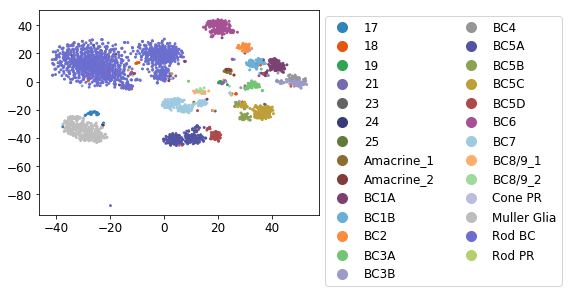

In [10]:
scprep.plot.scatter2d(data_tsne, c=clusters_subsample['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='t-SNE')

What do you notice? Is your favorite cell type nicely separated in this plot? How obvious is the distinction between the macro-level cell types of cone bipolar, rod bipolar, and glial cells?

#### Exercise n+2.1 - run t-SNE with different `perplexity` parameters

t-SNE's `perplexity` parameter describes the size of the neighborhood around each point. The authors recommend values between 5 and 100. Try a range of different values in and outside of this range and discuss the results with your group.

In [11]:
#data_tsne = sklearn.manifold.TSNE(perplexity=???).fit_transform(data_pca_subsample)

data_tsne = sklearn.manifold.TSNE(perplexity=80).fit_transform(data_pca_subsample)

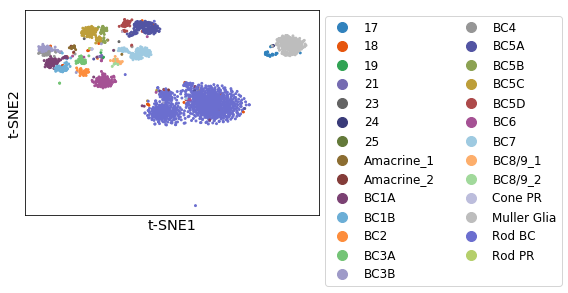

In [12]:
scprep.plot.scatter2d(data_tsne, c=clusters_subsample['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='t-SNE')

### 3.2. UMAP

#### Exercise n+2.2 - perform UMAP and plot the results

The syntax for UMAP is identical to t-SNE: `umap.UMAP().fit_transform`. UMAP is relatively fast, so you won't need to use the subsampled data.

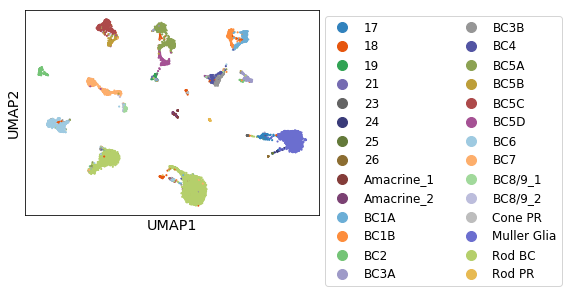

In [14]:
import umap
# data_umap = ???
# scprep.plot.scatter2d(???)

data_umap = umap.UMAP().fit_transform(data_pca)
scprep.plot.scatter2d(data_umap, c=clusters['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='UMAP')

What do you notice? Is your favorite cell type nicely separated in this plot? How obvious is the distinction between the macro-level cell types of cone bipolar, rod bipolar, and glial cells? How does this plot compare to t-SNE?

#### Exercise n+2.3 - run UMAP with different `n_neighbors` and `min_dist` parameters

UMAP's `n_neighbors` parameter describes the size of the neighborhood around each point. The `min_dist` parameter describes how tightly points can be packed together. The authors recommend values between 2 and 200 for `n_neighbors`, and between 0 and 0.99 for `min_dist`. Try a range of different values in and outside of these ranges and discuss the results with your group.

In [16]:
# data_umap = umap.UMAP(n_neighbors=???, min_dist=???).fit_transform(data_pca)

data_umap = umap.UMAP(n_neighbors=40, min_dist=0.02).fit_transform(data_pca)

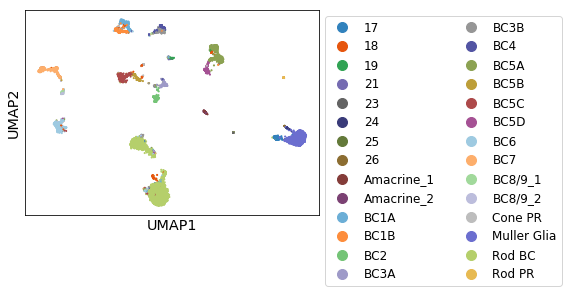

In [17]:
scprep.plot.scatter2d(data_umap, c=clusters['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='UMAP')

### 3.3. PHATE

#### Exercise n+2.4 - perform PHATE and plot the results

The syntax for PHATE is identical to UMAP and t-SNE: `phate.PHATE().fit_transform`. PHATE is relatively fast, so you won't need to use the subsampled data.

Calculating PHATE...
  Running PHATE on 27499 cells and 100 genes.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 77.11 seconds.
    Calculating affinities...
    Calculated affinities in 0.49 seconds.
  Calculated graph and diffusion operator in 77.73 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 3.23 seconds.
    Calculating KMeans...
    Calculated KMeans in 21.29 seconds.
  Calculated landmark operator in 26.33 seconds.
  Calculating optimal t...
    Automatically selected t = 31
  Calculated optimal t in 2.32 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.64 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 25.96 seconds.
Calculated PHATE in 134.99 seconds.


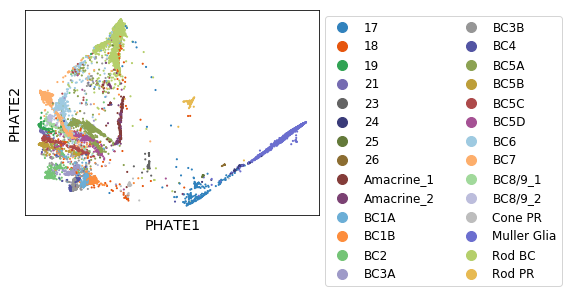

In [18]:
import phate
# data_phate = ???
# scprep.plot.scatter2d(???)

data_phate = phate.PHATE().fit_transform(data_pca)
scprep.plot.scatter2d(data_phate, c=clusters['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='PHATE')

What do you notice? Is your favorite cell type nicely separated in this plot? How obvious is the distinction between the macro-level cell types of cone bipolar, rod bipolar, and glial cells? How does this plot compare to t-SNE and UMAP?

#### Exercise n+2.3 - run PHATE with different `knn` and `t` parameters

UMAP's `knn` parameter describes the size of the neighborhood around each point. The `t` parameter describes how much denoising is performed. We recommend values between 2 and 100 for `n_neighbors`, and between 2 and 150 for `t`. Try a range of different values in and outside of these ranges and discuss the results with your group.

In [19]:
# data_phate = phate.PHATE(knn=???, t=???).fit_transform(data_pca)

data_phate = phate.PHATE(knn=3, t=90).fit_transform(data_pca)

Calculating PHATE...
  Running PHATE on 27499 cells and 100 genes.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 72.74 seconds.
    Calculating affinities...
    Calculated affinities in 0.60 seconds.
  Calculated graph and diffusion operator in 73.44 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 2.54 seconds.
    Calculating KMeans...
    Calculated KMeans in 20.65 seconds.
  Calculated landmark operator in 24.92 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.90 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 7.51 seconds.
Calculated PHATE in 108.79 seconds.


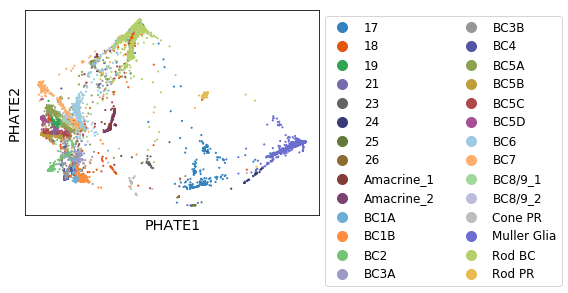

In [20]:
scprep.plot.scatter2d(data_phate, c=clusters['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='PHATE')

## 5. Evaluating dimensionality reduction methods

In order to decide which algorithm is best for you, it is important to understand how and why it works and when it doesn't. To demonstrate this, we'll use a simulated dataset from `Splatter`.

In [21]:
sim = scprep.run.SplatSimulate(method='paths', batch_cells=3000, 
                               path_from=[0, 0, 1, 1, 2, 2], group_prob=[0.1, 0.2, 0.3, 0.2, 0.1, 0.1])

R[write to console]: Getting parameters...
R[write to console]: Creating simulation object...
R[write to console]: Simulating library sizes...
R[write to console]: Simulating gene means...
R[write to console]: Simulating path endpoints...
R[write to console]: Simulating path steps...
R[write to console]: Simulating BCV...
R[write to console]: Simulating counts...
R[write to console]: Simulating dropout (if needed)...
R[write to console]: Done!


In [22]:
data_sim = scprep.normalize.library_size_normalize(sim['counts'])

In [23]:
data_sim = scprep.transform.sqrt(data_sim)

#### Exercise n+2.4: run PCA, t-SNE, UMAP and PHATE on the simulated data

In [24]:
# # Run PCA to 100 components
# data_pca = ???
# # Run t-SNE on the PCA
# data_tsne = ???
# # Run UMAP on the PCA
# data_umap = ???
# # Run PHATE on the PCA
# data_phate = ???

# Run PCA to 100 components
data_pca = scprep.reduce.pca(data_sim, n_components=100)
# Run t-SNE on the PCA
data_tsne = sklearn.manifold.TSNE().fit_transform(data_pca)
# Run UMAP on the PCA
data_umap = umap.UMAP().fit_transform(data_pca)
# Run PHATE on the PCA
data_phate = phate.PHATE().fit_transform(data_pca)

Calculating PHATE...
  Running PHATE on 3000 cells and 100 genes.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 1.05 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.10 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.23 seconds.
    Calculating KMeans...
    Calculated KMeans in 24.76 seconds.
  Calculated landmark operator in 26.41 seconds.
  Calculating optimal t...
    Automatically selected t = 15
  Calculated optimal t in 3.23 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.62 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 12.55 seconds.
Calculated PHATE in 45.92 seconds.


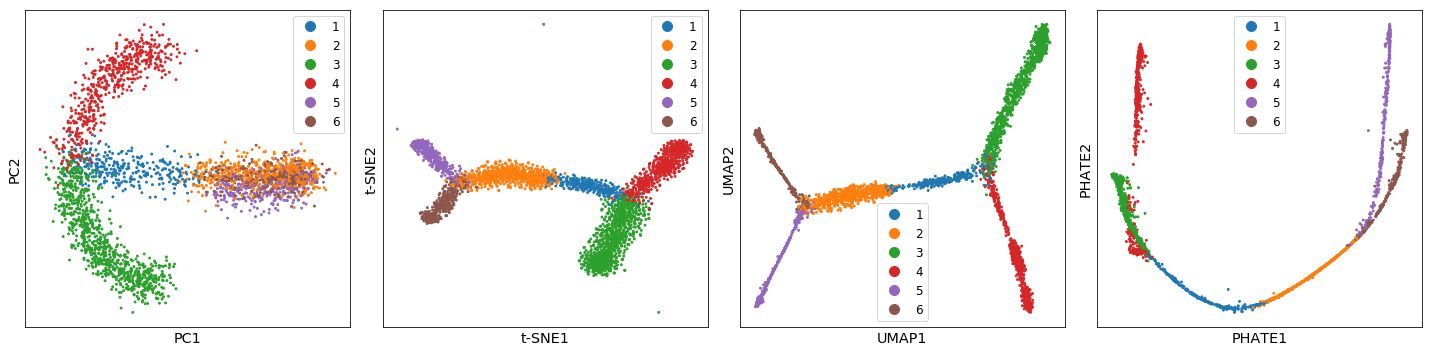

In [26]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
scprep.plot.scatter2d(data_pca, c=sim['group'], ax=axes[0],
                     ticks=False, label_prefix="PC")
scprep.plot.scatter2d(data_tsne, c=sim['group'], ax=axes[1],
                     ticks=False, label_prefix="t-SNE")
scprep.plot.scatter2d(data_umap, c=sim['group'], ax=axes[2],
                     ticks=False, label_prefix="UMAP")
scprep.plot.scatter2d(data_phate, c=sim['group'], ax=axes[3],
                     ticks=False, label_prefix="PHATE")
plt.tight_layout()

Notice that t-SNE, UMAP and PHATE all successfully capture the branch structure, while PCA collapses multiple branches on top of each other. Discuss why this may be with your group.

#### Exercise n+2.5: find simulation parameters that a) look good on all four visualizations, b) look bad for at least two of the visualizations, c) look bad for all of the visualizations

You can see the possible simulation parameters you can tune using `help(scprep.run.SplatSimulate)`.

In [27]:
help(scprep.run.SplatSimulate)

Help on function SplatSimulate in module scprep.run.splatter:

SplatSimulate(method='paths', batch_cells=100, n_genes=10000, batch_fac_loc=0.1, batch_fac_scale=0.1, mean_rate=0.3, mean_shape=0.6, lib_loc=11, lib_scale=0.2, lib_norm=False, out_prob=0.05, out_fac_loc=4, out_fac_scale=0.5, de_prob=0.1, de_down_prob=0.1, de_fac_loc=0.1, de_fac_scale=0.4, bcv_common=0.1, bcv_df=60, dropout_type='none', dropout_prob=0.5, dropout_mid=0, dropout_shape=-1, group_prob=1, path_from=0, path_length=100, path_skew=0.5, path_nonlinear_prob=0.1, path_sigma_fac=0.8, seed=None, verbose=1)
    Simulate count data from a fictional single-cell RNA-seq experiment using the Splat method.
    
    SplatSimulate is a Python wrapper for the R package Splatter. For more
    details, read about Splatter  on [GitHub](https://github.com/Oshlack/splatter)
    and [Bioconductor](https://bioconductor.org/packages/release/bioc/html/splatter.html).
    
    Parameters
    ----------
    batch_cells : list-like or int, o